---

## Imports

In [33]:
import pandas as pd
import numpy as np

import wget, os
import time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Day-Ahead-Market DataFrame

In [34]:
dam_orig_cols=['INTERVALSTARTTIME_GMT',
               'OPR_DT',
               'OPR_HR',
               'NODE',
               'MARKET_RUN_ID',
               'LMP_TYPE',
               'MW']

dam_new_cols =['start_datetime',
               'date',
               'hr_index',
               'node',
               'market',
               'lmp_type',
               'dam_price_per_mwh']

dam_rename_dict = {old: new for old, new in zip(dam_orig_cols, dam_new_cols)}

In [35]:
caiso_dam_df = pd.DataFrame(columns=dam_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_dam/*.csv'):
    df = pd.read_csv(file, usecols=dam_orig_cols).rename(index=str,
                                                         columns=dam_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_dam_df = caiso_dam_df.append(df, ignore_index=True)

In [36]:
caiso_dam_df.shape

(24, 7)

In [37]:
caiso_dam_df = caiso_dam_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_dam_df['start_datetime'] = pd.to_datetime(caiso_dam_df['start_datetime'])

caiso_dam_df.set_index('start_datetime', inplace=True)
caiso_dam_df.sort_index(inplace=True)
caiso_dam_df.head()

,date,hr_index,node,market,lmp_type,dam_price_per_mwh
start_datetime,,,,,,
2022-06-16 07:00:00+00:00,2022-06-16,1,0096WD_7_N001,DAM,LMP,71.31581
2022-06-16 08:00:00+00:00,2022-06-16,2,0096WD_7_N001,DAM,LMP,68.47734
2022-06-16 09:00:00+00:00,2022-06-16,3,0096WD_7_N001,DAM,LMP,66.35294
2022-06-16 10:00:00+00:00,2022-06-16,4,0096WD_7_N001,DAM,LMP,67.38432
2022-06-16 11:00:00+00:00,2022-06-16,5,0096WD_7_N001,DAM,LMP,70.51006


In [38]:
caiso_dam_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-06-16 07:00:00+00:00 to 2022-06-17 06:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               24 non-null     object 
 1   hr_index           24 non-null     object 
 2   node               24 non-null     object 
 3   market             24 non-null     object 
 4   lmp_type           24 non-null     object 
 5   dam_price_per_mwh  24 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.3+ KB


---

## Hour-Ahead-Scheduling Process DataFrame
(hour-ahead, 15-minute realtime market)

In [39]:
hasp_orig_cols=['INTERVALSTARTTIME_GMT',
                'OPR_DT',
                'OPR_HR',
                'NODE',
                'MARKET_RUN_ID',
                'LMP_TYPE',
                'MW']

hasp_new_cols =['start_datetime',
                'date',
                'hr_index',
                'node',
                'market',
                'lmp_type',
                'hasp_price_per_mwh']

hasp_rename_dict = {old: new for old, new in zip(hasp_orig_cols, hasp_new_cols)}

In [40]:
caiso_hasp_df = pd.DataFrame(columns=hasp_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_hasp/*.csv'):
    df = pd.read_csv(file, usecols=hasp_orig_cols).rename(index=str,
                                                          columns=hasp_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_hasp_df = caiso_hasp_df.append(df, ignore_index=True)

In [41]:
caiso_hasp_df.shape

(23164, 7)

In [42]:
caiso_hasp_df = caiso_hasp_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_hasp_df['start_datetime'] = pd.to_datetime(caiso_hasp_df['start_datetime'])

caiso_hasp_df.set_index('start_datetime', inplace=True)
caiso_hasp_df.sort_index(inplace=True)
caiso_hasp_df.head()

,date,hr_index,node,market,lmp_type,hasp_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,51.04837
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,49.55352
2019-03-04 08:30:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,45.65972
2019-03-04 08:45:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,45.22536
2019-03-04 09:00:00+00:00,2019-03-04,2,0096WD_7_N001,HASP,LMP,43.87333


In [43]:
caiso_hasp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23164 entries, 2019-03-04 08:00:00+00:00 to 2019-11-01 06:45:00+00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                23164 non-null  object 
 1   hr_index            23164 non-null  object 
 2   node                23164 non-null  object 
 3   market              23164 non-null  object 
 4   lmp_type            23164 non-null  object 
 5   hasp_price_per_mwh  23164 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


---

## RTM DataFrame
(realtime spot prices, 5-minute realtime settlements only)

In [44]:
rtm_orig_cols=['INTERVALSTARTTIME_GMT',
                'OPR_DT',
                'OPR_HR',
                'NODE',
                'MARKET_RUN_ID',
                'LMP_TYPE',
                'VALUE']

rtm_new_cols =['start_datetime',
                'date',
                'hr_index',
                'node',
                'market',
                'lmp_type',
                'rtm_price_per_mwh']

rtm_rename_dict = {old: new for old, new in zip(rtm_orig_cols, rtm_new_cols)}

In [45]:
caiso_rtm_df = pd.DataFrame(columns=rtm_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_rtm/*.csv'):
    df = pd.read_csv(file, usecols=rtm_orig_cols).rename(index=str,
                                                          columns=rtm_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_rtm_df = caiso_rtm_df.append(df, ignore_index=True)

In [46]:
caiso_rtm_df.shape

(78516, 7)

In [47]:
caiso_rtm_df = caiso_rtm_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_rtm_df['start_datetime'] = pd.to_datetime(caiso_rtm_df['start_datetime'])

caiso_rtm_df.set_index('start_datetime', inplace=True)
caiso_rtm_df.sort_index(inplace=True)
caiso_rtm_df.head()

,date,hr_index,node,market,lmp_type,rtm_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,44.94646
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,50.44476
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,48.90905
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,49.61934
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,49.27004


In [48]:
caiso_rtm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78516 entries, 2019-03-04 08:00:00+00:00 to 2019-11-01 06:55:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               78516 non-null  object 
 1   hr_index           78516 non-null  object 
 2   node               78516 non-null  object 
 3   market             78516 non-null  object 
 4   lmp_type           78516 non-null  object 
 5   rtm_price_per_mwh  78516 non-null  float64
dtypes: float64(1), object(5)
memory usage: 4.2+ MB


---

## Join DAM + HASP + RTM LMP's Into a Single DataFrame

In [49]:
elec_prices_5min = caiso_rtm_df.drop(columns=['market', 'lmp_type'])
elec_prices_5min.shape

(78516, 4)

In [50]:
elec_prices_5min.head()

,date,hr_index,node,rtm_price_per_mwh
start_datetime,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,44.94646
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,50.44476
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,48.90905
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,49.61934
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,49.27004


In [51]:
elec_prices_5min = elec_prices_5min.merge(caiso_hasp_df[['hasp_price_per_mwh']],
                              how='outer',
                              left_index = True,
                              right_index = True)
elec_prices_5min.shape

(78516, 5)

In [52]:
elec_prices_5min.head(15)

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh
start_datetime,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,44.94646,51.04837
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,50.44476,NaN
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,48.90905,NaN
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,49.61934,49.55352
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,49.27004,NaN
2019-03-04 08:25:00+00:00,2019-03-04,1,0096WD_7_N001,45.76822,NaN
2019-03-04 08:30:00+00:00,2019-03-04,1,0096WD_7_N001,45.64291,45.65972
2019-03-04 08:35:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,NaN
2019-03-04 08:40:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,NaN


In [53]:
elec_prices_5min = elec_prices_5min.merge(caiso_dam_df[['dam_price_per_mwh']],
                              how='outer',
                              left_index = True,
                              right_index = True)
elec_prices_5min.shape

(78540, 6)

In [54]:
elec_prices_5min.head(15)

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh,dam_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,44.94646,51.04837,NaN
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,50.44476,NaN,NaN
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,48.90905,NaN,NaN
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,49.61934,49.55352,NaN
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,49.27004,NaN,NaN
2019-03-04 08:25:00+00:00,2019-03-04,1,0096WD_7_N001,45.76822,NaN,NaN
2019-03-04 08:30:00+00:00,2019-03-04,1,0096WD_7_N001,45.64291,45.65972,NaN
2019-03-04 08:35:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,NaN,NaN
2019-03-04 08:40:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,NaN,NaN


In [55]:
elec_prices_5min.isna().sum().sum()

131028

In [56]:
elec_prices_5min.fillna(method='ffill', inplace=True)

In [57]:
elec_prices_5min.isna().sum().sum()

78516

In [58]:
elec_prices_5min.shape

(78540, 6)

In [59]:
elec_prices_5min.head(20)

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh,dam_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,44.94646,51.04837,NaN
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,50.44476,51.04837,NaN
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,48.90905,51.04837,NaN
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,49.61934,49.55352,NaN
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,49.27004,49.55352,NaN
2019-03-04 08:25:00+00:00,2019-03-04,1,0096WD_7_N001,45.76822,49.55352,NaN
2019-03-04 08:30:00+00:00,2019-03-04,1,0096WD_7_N001,45.64291,45.65972,NaN
2019-03-04 08:35:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,45.65972,NaN
2019-03-04 08:40:00+00:00,2019-03-04,1,0096WD_7_N001,43.88283,45.65972,NaN


In [60]:
elec_prices_5min.tail(20)

,date,hr_index,node,rtm_price_per_mwh,hasp_price_per_mwh,dam_price_per_mwh
start_datetime,,,,,,
2022-06-16 11:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,70.51006
2022-06-16 12:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,72.57454
2022-06-16 13:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,73.44653
2022-06-16 14:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,245.77580
2022-06-16 15:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,79.49487
2022-06-16 16:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,46.69257
2022-06-16 17:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,126.04000
2022-06-16 18:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,46.71138
2022-06-16 19:00:00+00:00,2019-10-31,24,0096WD_7_N001,34.10837,34.10837,54.76537


In [61]:
# elec_prices_5min.to_csv('../data/elec_prices_5min.csv')

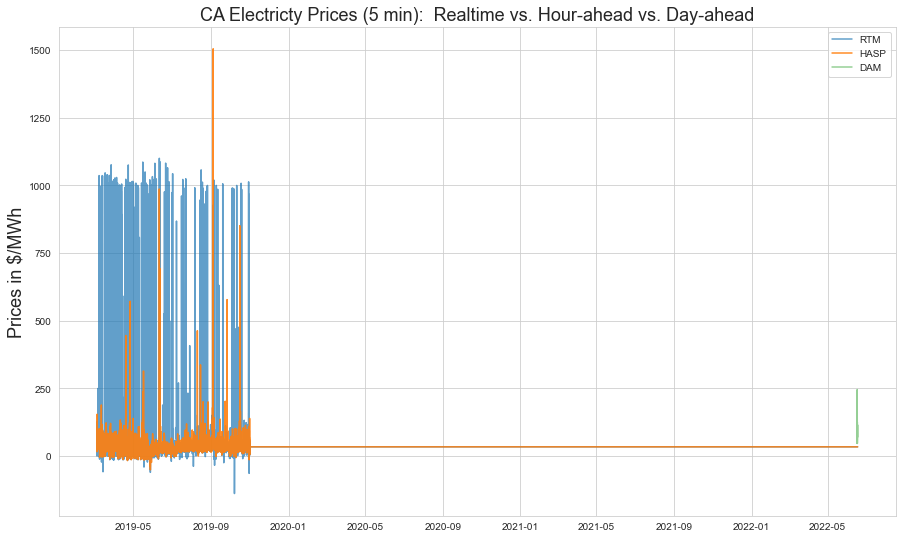

''

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(15,9))
plt.title('CA Electricty Prices (5 min):  Realtime vs. Hour-ahead vs. Day-ahead', fontsize=18)

plt.plot(elec_prices_5min.index,
         elec_prices_5min.rtm_price_per_mwh,
         label = 'RTM', alpha=0.7)

plt.plot(elec_prices_5min.index,
         elec_prices_5min.hasp_price_per_mwh,
         label= 'HASP', alpha=0.9)

plt.plot(elec_prices_5min.index,
         elec_prices_5min.dam_price_per_mwh,
         label = 'DAM', alpha=0.5)

plt.ylabel('Prices in $/MWh', fontsize=18)
plt.legend()
plt.show()
plt.savefig('../images/elec_prices_5min.jpg', bbox_inches='tight')
;